<a href="https://colab.research.google.com/github/JasmineSingh1/Supervised-Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset source: https://media.geeksforgeeks.org/wp-content/uploads/20240522153809/yahoo_data%5B1%5D.xlsx

In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240522153809/yahoo_data%5B1%5D.xlsx'
df = pd.read_excel(url)

In [43]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Apr 28, 2023",33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,"Apr 27, 2023",33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,"Apr 26, 2023",33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,"Apr 25, 2023",33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,"Apr 24, 2023",33805.04,33891.15,33726.09,33875.40,33875.40,252020000


In [44]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close*,0
Adj Close**,0
Volume,0


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6   Volume       1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


,Open,High,Low,Close*,Adj Close**,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08


In [46]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close*,float64
Adj Close**,float64
Volume,int64


Since, the data being used is a time series data, converting the Date column into datetime dtype.

In [47]:
df['Date'] = pd.to_datetime(df['Date'])

In [48]:
df.dtypes

,0
Date,datetime64[ns]
Open,float64
High,float64
Low,float64
Close*,float64
Adj Close**,float64
Volume,int64


Creating a copy of the dataframe and setting 'Date' as the index.

In [49]:
df_cleaned = df.set_index('Date')

In [50]:
df_cleaned.head()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


Dropping the not required columns

In [51]:
df_cleaned.drop(columns = ['Adj Close**'], inplace = True)

In [52]:
df_cleaned.head()

,Open,High,Low,Close*,Volume
Date,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,252020000


In [53]:
df_cleaned.rename(columns = {'Close*': 'Close'}, inplace = True)

In [54]:
df_cleaned.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,354310000
2023-04-27,33381.66,33859.75,33374.65,33826.16,343240000
2023-04-26,33596.34,33645.83,33235.85,33301.87,321170000
2023-04-25,33828.34,33875.49,33525.39,33530.83,297880000
2023-04-24,33805.04,33891.15,33726.09,33875.40,252020000


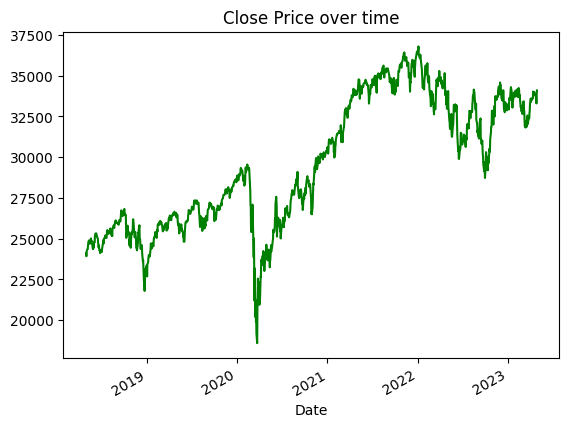

In [55]:
df_cleaned['Close'].plot(title='Close Price over time', color='green')
plt.show()

In [56]:
df_cleaned['Close Next'] = df_cleaned['Close'].shift(-1)

In [57]:
df_cleaned.head()

,Open,High,Low,Close,Volume,Close Next
Date,,,,,,
2023-04-28,33797.43,34104.56,33728.40,34098.16,354310000,33826.16
2023-04-27,33381.66,33859.75,33374.65,33826.16,343240000,33301.87
2023-04-26,33596.34,33645.83,33235.85,33301.87,321170000,33530.83
2023-04-25,33828.34,33875.49,33525.39,33530.83,297880000,33875.40
2023-04-24,33805.04,33891.15,33726.09,33875.40,252020000,33808.96


In [58]:
df_cleaned.tail()

,Open,High,Low,Close,Volume,Close Next
Date,,,,,,
2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,24262.51
2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,23930.15
2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,23924.98
2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,24099.05
2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN


In [59]:
df_cleaned = df_cleaned.dropna()

In [60]:
input_features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df_cleaned[input_features]
y = df_cleaned['Close Next']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [63]:
X_train

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-09,26094.92,26103.28,25523.51,25706.09,387610000
2022-07-14,30451.80,30680.12,30143.93,30630.17,325130000
2019-04-22,26510.77,26553.05,26458.61,26511.05,232570000
2018-09-21,26726.25,26769.16,26680.37,26743.50,657620000
2021-10-21,35520.32,35612.36,35442.53,35603.08,298390000
...,...,...,...,...,...
2019-03-07,25645.45,25645.45,25352.55,25473.23,289140000
2018-12-20,23224.12,23282.20,22644.31,22859.60,576700000
2018-10-30,24482.04,24906.68,24415.69,24874.64,470050000


In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
X_train_scaled

array([[-0.86162999, -0.90387989, -0.95696592, -0.95908057,  0.39517489],
       [ 0.22794784,  0.23965212,  0.19849192,  0.27078273, -0.18110142],
       [-0.75763333, -0.79150401, -0.72311951, -0.75802966, -1.03481679],
       ...,
       [-1.26498245, -1.20285263, -1.23400552, -1.16674776,  1.15554972],
       [-0.36500939, -0.39349749, -0.32709858, -0.35575051, -0.19106267],
       [-1.07006094, -1.05277411, -1.02249593, -1.02012066, -0.09246481]])

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [69]:
regressor_model = LinearRegression()

In [70]:
regressor_model.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
print(y_train.dtypes)

float64


In [72]:
print(y_train.isnull().sum())

0


In [73]:
y_train = y_train.fillna(y_train.median())

In [ ]:
regressor_model.fit(X_train_scaled, y_train)

In [74]:
y_predictions = regressor_model.predict(X_test_scaled)


In [75]:
y_predictions

array([34755.07140643, 34582.76082214, 34232.0028323 , 33919.99765854,
       24646.10062557, 35098.50473439, 25880.75475222, 30374.81986547,
       24779.16104591, 25990.2341213 , 35463.57876066, 25970.01617424,
       30700.00413751, 24079.58188624, 25048.29188505, 34979.67210258,
       26191.43932411, 25510.43172272, 34381.59514538, 26505.92286085,
       26090.62425189, 26397.37680379, 30595.57448714, 27070.24885342,
       26388.93388121, 23280.72241897, 25394.04380111, 34387.26461287,
       24839.05178928, 32870.81334409, 26006.1573418 , 36224.92284609,
       28188.80852028, 27801.95158073, 19912.8948485 , 26407.85676403,
       35106.01290346, 33776.2206493 , 24111.29212921, 31077.00168273,
       24305.03040638, 27214.76600683, 25005.43458203, 32741.441877  ,
       25902.14186474, 25908.95809557, 35282.8338327 , 32216.27983146,
       27160.7559902 , 25442.88232332, 33019.93243779, 33758.44906578,
       35466.7107223 , 26821.96742194, 31740.45244748, 32778.25380784,
      

Evaluating the model performance

In [76]:
# mean squared error - computed from training data
mse = cross_val_score(regressor_model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = 5)
np.mean(mse)

np.float64(-25732.767424732603)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

In [78]:
mse = mean_squared_error(y_true = y_test, y_pred = y_predictions)
print("MSE:", mse)
# this mse is computed from test data

MSE: 20479.186111753806


In [79]:
r2 = r2_score(y_true = y_test, y_pred = y_predictions)
print("R²:", r2)

R²: 0.998738369127819


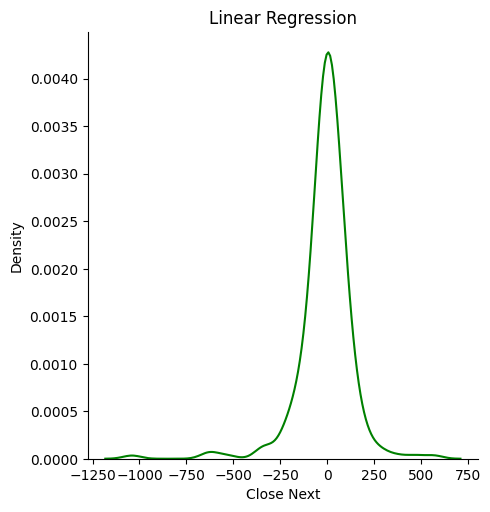

In [80]:
sns.displot(y_test - y_predictions, kind='kde', color = 'green')
plt.title('Linear Regression')
plt.show()